In [3]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import json

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
magpie_csv_file = '../data/magpie/processed_MAGPIE_filtered_split_typebased.csv'

In [6]:
df_mp = pd.read_csv(magpie_csv_file)
df_mp

,sentence_0,idiom,confidence,label,split,variant_type,offsets
0,"For example , with fell running and mountain m...",off the beaten track,1.000000,i,training,identical,"[[117, 120], [125, 131], [132, 137]]"
1,I 'd keep him well in the running .,in the running,0.770109,i,training,identical,"[[19, 21], [26, 33]]"
2,"He gives me the creeps , so I looked round , h...",give someone the creeps,1.000000,i,training,combined-inflection,"[[3, 8], [9, 11], [16, 22]]"
3,"‘ He 's done us proud , as well,’ says Granvil...",do someone proud,1.000000,i,training,combined-inflection,"[[8, 12], [13, 15], [16, 21]]"
4,"People quickly embraced formal democracy , but...",take root,1.000000,i,training,identical,"[[136, 140], [141, 145]]"
...,...,...,...,...,...,...,...
48390,Many also have second or third jobs to make en...,make ends meet,0.854973,i,test,identical,"[[39, 43], [44, 48], [49, 53]]"
48391,"Take people to objections , take them to where...",bear in mind,1.000000,i,training,identical,"[[71, 75], [76, 78], [79, 83]]"
48392,"Indeed we are rarely aware of them as rules , ...",as a rule,1.000000,l,training,deletion-determiner,"[[35, 37], [38, 43]]"
48393,Unlike in a firm that is a jack of all trades ...,jack of all trades,1.000000,i,training,identical,"[[27, 31], [32, 34], [35, 38], [39, 45]]"


In [25]:
df_vis = df_mp[['label', 'split', 'idiom', 'sentence_0']]
df_vis = df_vis.groupby(['split', 'label'], as_index=False).agg({'sentence_0': 'count', 'idiom': 'nunique'})

df_vis.rename(columns={'sentence_0': 'sent_count', 'idiom': 'pie_count'}, inplace=True)
split_name_map ={'training':'training', 'development':'validation', 'test':'test'}
df_vis['split'] = df_vis['split'].map(split_name_map)
label_map = {'i': 'idiom', 'l': 'literal'}
df_vis['label'] = df_vis['label'].map(label_map)
df_vis = df_vis.reindex([4,5, 0,1, 2,3])
df_vis

,split,label,sent_count,pie_count
4,training,idiom,29526,1416
5,training,literal,9189,487
0,validation,idiom,3473,135
1,validation,literal,1367,43
2,test,idiom,3329,166
3,test,literal,1511,61


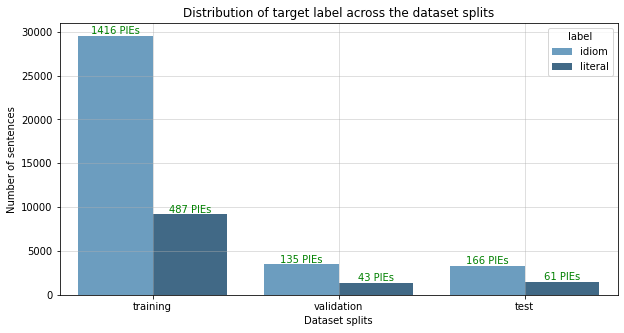

In [34]:
num_of_pies = df_vis['pie_count'].values
total_pies = sum(num_of_pies)

plt.figure(figsize=(10,5))
ax = sns.barplot(x='split', y='sent_count', palette="Blues_d", hue='label', data=df_vis)

plt.xlabel('Dataset splits')
# Display the actual numbers on the bars
all_counts = df_vis['sent_count'].values
for x_tick,(num_of_pie,y_count) in enumerate(zip(num_of_pies, all_counts)):
    # To address the stacked bars,
    if x_tick % 2 == 0:
        x_tick = int(x_tick/2) - 0.2
    else:
        x_tick = int(x_tick/2) + 0.2
    ax.text(x_tick, y_count+200, f"{num_of_pie} PIEs", color='green', ha='center')

plt.ylabel('Number of sentences')
# plt.yticks(np.arange(0, 100, 10))

plt.grid()
plt.rcParams['grid.alpha'] = 0.5

plt.title(f'Distribution of target label across the dataset splits')
plt.show()